# Módulo de Matemáticas 101: práctica

Vamos a poner de nuevo en práctica lo que hemos visto en este módulo. La práctica se centra en la regresión lineal (¡tema muy importante!) y podéis preguntarme las dudas que tengáis por Discord. ¡Mucha suerte!

## 1. Regresión lineal con mínimos cuadrados

En este ejercicio vamos a implementar la forma matricial de la regresión lineal con el método de los mínimos cuadrados. Para ello, tendrás que:

- Explorar un dataset
- Implementar la regresión lineal
- Aplicarla a un dataset concreto

Como recordatorio, los valores de los pesos $\widehat{w}$ vienen dados por:

<center>$\widehat{w} = (X^T X)^{-1}X^T y,$</center>

Donde $y$ es la variable a predecir y $X$ la matriz de features (NOTA: revisa cómo se define en los apuntes). Sabemos que los pesos van a ser los parámetros de la ecuación lineal que estamos intentando ajustar y tendremos uno por cada variable de entrada que usemos y además un término independiente o bias.

### 1.1 Carga del dataset y exploración de datos

Vamos a usar el dataset de [Auto MPG](https://archive.ics.uci.edu/dataset/9/auto+mpg) que podemos encontrar en el [repositorio de Machine learning de UC Irvine](https://archive.ics.uci.edu/). Lo primero, vamos a familiarizarnos con los datos.

En el propio repositorio nos indican cómo descargar el dataset con su librería (podemos consultar el código fuente si queremos).

In [2]:
!pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeable


In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
auto_mpg = fetch_ucirepo(id=9) 
  
# data (as pandas dataframes) 
X = auto_mpg.data.features 
y = auto_mpg.data.targets 
  
# metadata 
print(auto_mpg.metadata) 
  
# variable information 
print(auto_mpg.variables) 


{'uci_id': 9, 'name': 'Auto MPG', 'repository_url': 'https://archive.ics.uci.edu/dataset/9/auto+mpg', 'data_url': 'https://archive.ics.uci.edu/static/public/9/data.csv', 'abstract': 'Revised from CMU StatLib library, data concerns city-cycle fuel consumption', 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 398, 'num_features': 7, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['mpg'], 'index_col': ['car_name'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1993, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5859H', 'creators': ['R. Quinlan'], 'intro_paper': None, 'additional_info': {'summary': 'This dataset is a slightly modified version of the dataset provided in the StatLib library.  In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for th

Con la función `head` de Pandas podemos ver las primeras filas del dataset.

In [4]:
X.head()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1


In [5]:
y.head()

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


En este punto, puedes hacer cualquier otro análisis exploratorio que creas conveniente.

A continuación, crea una función a la que le pases los dataframes de features y de target y el nombre de la variable y haga la gráfica del target (consumo en millas por galón) vs la variable que le ha llegado por parámetro. Puedes ver un ejemplo de gráfica más abajo, pero usa los parámetros que quieras en cuanto a color de los puntos, grids etc.

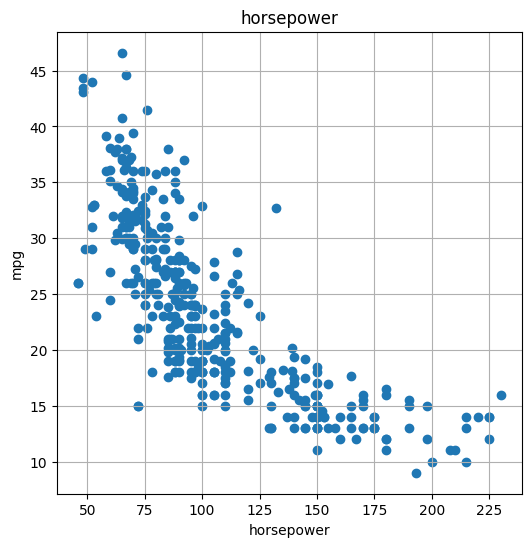

In [6]:
import matplotlib.pyplot as plt

def visualiza(df, y, nombre_columna):
    # TODO dibuja la gráfica
    plt.figure(figsize=(6, 6))
    
    plt.scatter(df[nombre_columna], y)
    
    plt.xlabel(nombre_columna)
    plt.ylabel('mpg')
    plt.title(f'{nombre_columna}')
    plt.grid(True)
    
    plt.show()
    

visualiza(X, y, 'horsepower')

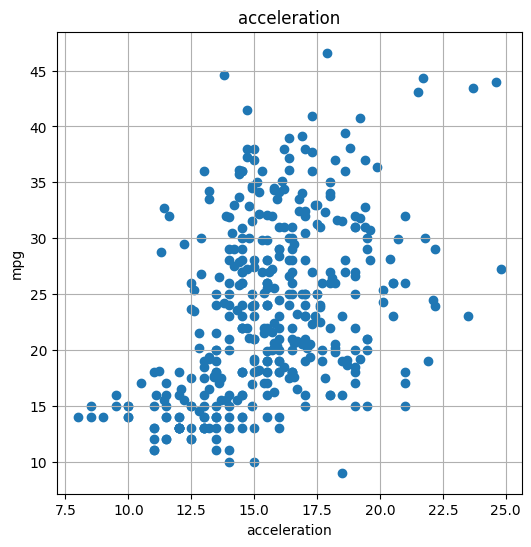

In [7]:
visualiza(X, y, 'acceleration')

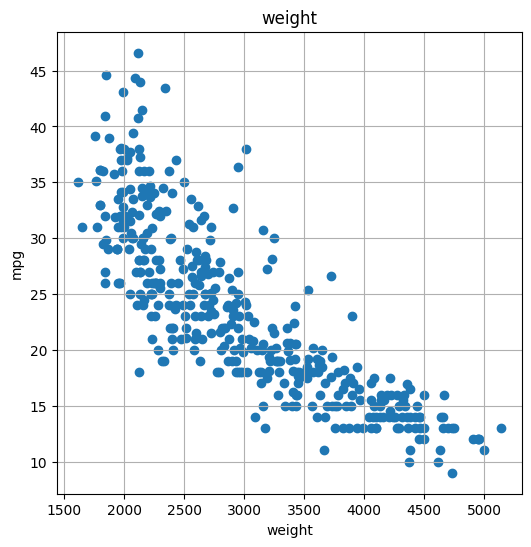

In [8]:
visualiza(X, y, 'weight')

IMPORTANTE: Aunque lo ideal sería un modelo multivariante, vamos a elegir la variable `weight` y hacer una regresión lineal solo con esta variable.

### 1.2 Implementación del modelo

En este punto vamos a dar un paso atrás y olvidarnos de los datos de consumo por un momento, porque el algoritmo que vamos a implementar serviría para cualquier conjunto de datos.

Lo primero, implementa una función que devuelva los valores de $\widehat{w}$ dados X e y. Si se da el caso de que el dataset tiene más features que observaciones, lo mostramos por pantalla y salimos de la función. Lo hacemos porque, como vimos en clase, los resultados no van a ser buenos si el número de observaciones es menor.

In [9]:
import numpy as np

def pesos_ols(X, y):
    # Implementa la fórmula matricial
    
    # TODO 1 Comprueba que las dimensiones son adecuadas
    n_x, n_y = X.shape
    if n_x < n_y:
        print("n_x es menos que n_y")
        return None
    # TODO 2 Prepara la matriz X para que tenga la forma adecuada para aplicar la fórmula 
    X_b = np.hstack((np.ones((n_x, 1)), X))

    # TODO 3 Calcula los pesos
    w = np.dot(np.dot(np.linalg.inv(np.dot(X_b.T, X_b)), X_b.T), y)

    return w

In [10]:
# Arrays de prueba!! No son dataset reales y no hace falta que los dibujemos
X_prueba = np.array([[1710, 1262, 1786, 1717, 2198, 1362, 1694, 2090, 1774, 1077], 
              [2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939]])
y_prueba = np.array([208500, 181500, 223500, 140000, 250000, 143000, 307000, 200000, 129900, 118000])
pesos_ols(X_prueba, y_prueba)

n_x es menos que n_y


In [11]:
X_prueba = np.array([[1710, 1262, 1786, 1717, 2198, 1362, 1694, 2090, 1774, 1077], 
              [2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939]]).reshape(10,2)
y_prueba = np.array([208500, 181500, 223500, 140000, 250000, 143000, 307000, 200000, 129900, 118000])
pesos_ols(X_prueba, y_prueba)

array([ 1.98968523e+05,  7.36278026e+01, -8.63759760e+01])

Hasta aquí hemos implementado el algoritmo de mínimos cuadrados y lo hemos probado en un array de tamaño 2x10, pero aún no lo hemos probado con ningún dataset real. 

### 1.3 Prueba del modelo en los datos de consumo de coches

Ahora sí, ya podemos usar nuestra función `pesos` en el dataset real que hemos descargado, el de consumo de combustible. Para ver el ajuste, dibuja de nuevo los datos junto con la recta que has obtenido, en la misma gráfica. Tendrás que convertir los dataframes de Pandas en arrays de numpy para poder aplicar las operaciones matriciales.

TIP: Revisa las dimensiones de todos los arrays para ver que son correctas.

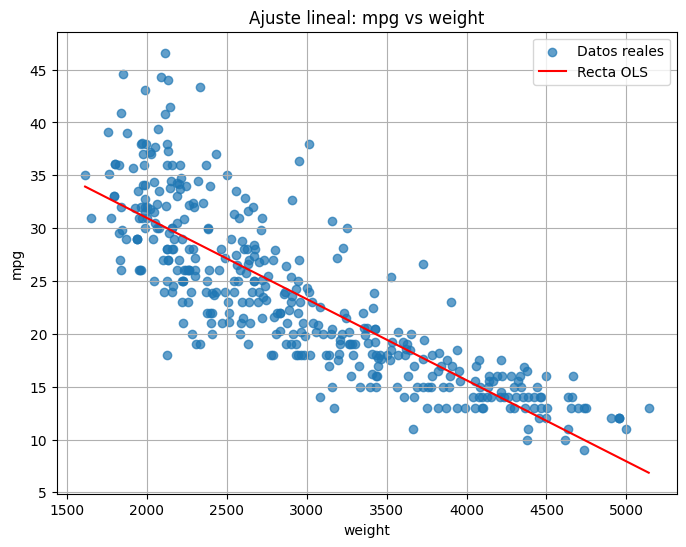

In [12]:
# TODO Aplica el modelo y dibuja la recta junto con los datos
X_np = X[['weight']]
y_np = y['mpg']
W = pesos_ols(X_np, y_np)

x_recta = np.linspace(X_np.min(), X_np.max(), 100)
y_recta = W[0] + W[1]*x_recta

plt.figure(figsize=(8, 6))
plt.scatter(X_np, y_np, alpha=0.7, label='Datos reales')
plt.plot(x_recta, y_recta, color='red', label='Recta OLS')

plt.xlabel('weight')
plt.ylabel('mpg')
plt.title('Ajuste lineal: mpg vs weight')
plt.grid(True)
plt.legend()
plt.show()


Por último, vamos a comprar el resultado con el que nos da `scikit-learn`para ver si nuestra implementación tiene buena pinta. Podemos ver cómo funciona en la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

In [13]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [14]:
from sklearn.linear_model import LinearRegression

# Creamos el objeto
lr = LinearRegression()

# Le pasamos los datos en el formato correcto
X = auto_mpg.data.features 
y = auto_mpg.data.targets 

X_lr = X[['weight']]
y_lr = y

# Entrenamos con los datos
lr.fit(X_lr,y_lr)
print("Punto de corte:", lr.intercept_)
print("Pendiente:", lr.coef_)

Punto de corte: [46.31736442]
Pendiente: [[-0.00767661]]


**TODO**: Analiza el resultado obtenido y compáralo con el de sklearn (solo hay que ver si coincide o no para saber si te has equivocado en algún punto). Si coincide, ¡enhorabuena! Ya sabes implementar tu primer modelo de Machine Learning desde la base.

### 1.4 Compara el método de mínimos cuadrados y el descenso del gradiente para obtener los coeficientes de una regresión lineal



Mínimos cuadrados. Calcula los coeficientes mediante una fórmula cerrada. Es rápido y exacto para datasets pequeños o medianos, pero requiere invertir una matriz, lo que lo hace poco escalable y problemático si hay muchas variables o colinealidad.

Descenso del gradiente. Obtiene los coeficientes de forma iterativa, sin invertir matrices. Es más escalable y flexible, adecuado para datasets grandes, pero la solución es aproximada y depende de hiperparámetros como la tasa de aprendizaje.

En resumen. Mínimos cuadrados es ideal para problemas pequeños y bien condicionados. Descenso del gradiente es preferible cuando los datos son grandes o el modelo no permite una solución analítica directa.

## 2. Optimización con descenso del gradiente

Vamos a resolver el mismo problema usando el descenso del gradiente en lugar de la solución analítica. El descenso del gradiente es un método de optimización iterativo que usa el operador gradiente.

Como es iterativo, necesitamos decirle cuándo tiene que parar y darnos la solución. En este caso, le vamos a decir que pare y nos devuelva la solución después de un número de iteraciones que le pasaremos como parámetro. La ecuación iterativa es.

$$w^{t+1} = w^t - \eta \cdot \nabla f(w)$$

donde f es nuestra función objetivo, y w es un vector. Para la función objetivo, vamos a usar el error RSS, que querremos minimizar.

$$ RSS(w) = \frac{1}{2}\sum_{n=1}^{N}[y_n-f(x_n)]^2$$

y cuyo gradiente es:

$$\nabla RSS(w) = X^T(Xw^t-y)$$

TIP: Ten en cuenta que el RSS también lo puedes escribir como $\frac{1}{2}\sum_{n=1}^{N}[y_n-\hat{y_n}]^2$ donde $\hat{y_n} = X \hat{w}$ en cada paso.

### 2.1 Implementar el descenso del gradiente

Completa las siguientes funciones para implementar el descenso del gradiente con la función objetivo de la regresión lineal. La función necesitará:

- La entrada X y salida y de la regresión
- Un punto inicial desde el que empezar a iterar
- El número de iteraciones 
- El learning rate

La función nos devolverá un array con las w resultantes de las iteraciones y otro con el valor de la función en cada paso del algoritmo, a la que también se conoce como *loss function*.

In [15]:
import numpy as np

def gradient_descent(X, y, w0, n_iter, eta): 
    # Define la función que calcule n_iter iteraciones del descenso del gradiente
    # Inicializamos variables
    # Si eliges otra forma de resolverlo, puedes borrar esta parte

    #perdida de cada iteracion.
    loss_iter = [np.inf]
    #vectores de peso
    w_iter = [w0]
    #peso actual
    w = w0
    n = X.shape[0]
    
    # TODO 1 Añade la columna de 1s
    X_new = np.hstack((np.ones((n,1)), X))
    
    # TODO 2 Haz un bucle para las iteraciones 
    # TODO 3 Dentro del bucle tendrás que actualizar el error y los pesos y añadirlos a las listas
    for _ in range(n_iter):
        #prediciones
        y_pred = X_new @ w
        error = y_pred - y 
        #perdida 
        per = (1 / (2 * n)) * np.sum(error ** 2)
        #Gradiante
        grad = (1 / n) * (X_new.T @ error)
        #actualizar pesos
        w = w - eta * grad
        # Guardar resultados
        w_iter.append(w)
        loss_iter.append(per)
    
    # Devuelve los resultados
    return np.array(w_iter), np.array(loss_iter)


# Tendrás que probar a cambiar estos parámetros
eta = 0.05
iteraciones = 1000 

np.random.seed(125)
w0 = np.random.rand(2).reshape((2,1))

# Aquí va otro array de prueba para la función, aún no es nuestro dataset real que solo usaremos una vez la función esté implementada
# Puedes probar con los datos de prueba que quieras
y = np.array([208500, 181500, 223500, 140000, 250000]).reshape((5,1))
X = np.array( [[  0.37020659],
               [  -0.48234664],
               [  0.51483616],
               [  0.38352774],
               [  1.29888065]])

weights, loss = gradient_descent(X, y, w0, iteraciones, eta)

print(weights[-1])

[[183845.76457227]
 [ 40415.76870162]]


### 2.2 Aplicar al dataset de consumo de combustible

Leemos de nuevo los datos y aplicamos la función que acabamos de programar.

In [16]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
auto_mpg = fetch_ucirepo(id=9) 
  
# data (as pandas dataframes) 
X = auto_mpg.data.features 
y = auto_mpg.data.targets 
  
# convert to numpy
X_np = X['weight'].to_numpy().reshape((X.shape[0], 1))
y_np = y.to_numpy()

print(X_np.shape)
print(y_np.shape)

(398, 1)
(398, 1)


Para ayudar al algoritmo, vamos a escalar la variable X, restando la media y dividiendo entre la desviación estándar. Después aplicamos la función anterior y dibujamos.

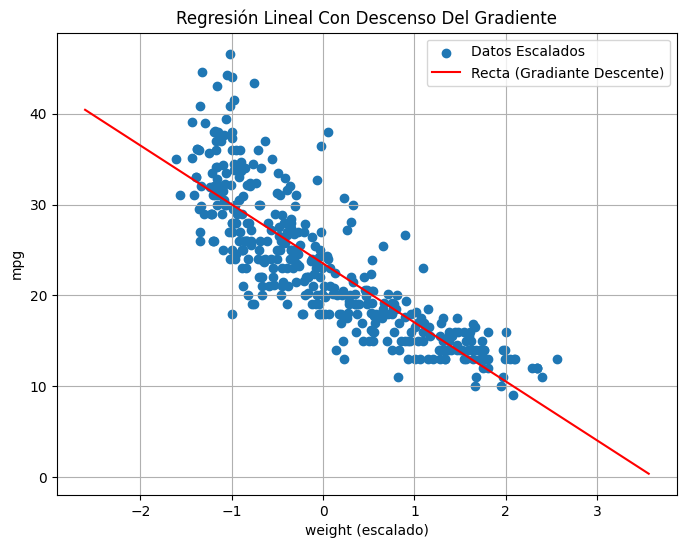

In [26]:
# TODO Aplica el modelo y dibuja la recta junto con los datos

X = auto_mpg.data.features
y = auto_mpg.data.targets

# Escalamos la variable x 

X_np = X['weight'].to_numpy().reshape((X.shape[0], 1))
y_np = y.to_numpy()

X_gd=(X_np - X_np.mean()) / X_np.std()
y_gd = y_np

# TODO 1 Punto inicial y learning rate
np.random.seed(125)
w0 = np.random.rand(2).reshape((2,1))

eta = 0.05
iteraciones = 1000 

# TODO 2 Aplicamos el algoritmo
weights, loss = gradient_descent(X_gd, y_gd, w0, iteraciones, eta)

# Límites de los ejes
x_max = np.max(X_gd) + 1
x_min = np.min(X_gd) -1

# TODO 3 Dibuja la gráfica conjunta de la recta y los puntos (escalados)
w_final = weights[-1]
x_recta = np.linspace(x_min, x_max, 100)
y_recta = w_final[0] + w_final[1]*x_recta

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

plt.scatter(X_gd, y_gd,label='Datos Escalados')
plt.plot(x_recta, y_recta, color='red', label='Recta (Gradiante Descente)')

plt.xlabel('weight (escalado)')
plt.ylabel('mpg')
plt.title('Regresión Lineal Con Descenso Del Gradiente')
plt.grid(True)
plt.legend()
plt.show()

